Download Simpsons data set from Kaggle using instructions from https://www.kaggle.com/general/74235

In [0]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"antondergunov","key":"8dd45403b15ba20c513db8b71af93d31"}'}

In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download alexattia/the-simpsons-characters-dataset

100% 1.06G/1.07G [00:19<00:00, 50.1MB/s]
100% 1.07G/1.07G [00:19<00:00, 57.9MB/s]


In [5]:
!unzip /content/the-simpsons-characters-dataset.zip

Archive:  /content/the-simpsons-characters-dataset.zip
  inflating: number_pic_char.csv     
  inflating: annotation.txt          
  inflating: simpsons_dataset.tar.gz  
  inflating: characters_illustration.png  
  inflating: simpsons_dataset.zip    
  inflating: kaggle_simpson_testset.zip  
  inflating: weights.best.hdf5       


In [0]:
!unzip -qq /content/simpsons_dataset.zip

In [7]:
!ls /content/simpsons_dataset

abraham_grampa_simpson	  hans_moleman	       moe_szyslak
agnes_skinner		  helen_lovejoy        ned_flanders
apu_nahasapeemapetilon	  homer_simpson        nelson_muntz
barney_gumble		  jasper_beardly       otto_mann
bart_simpson		  jimbo_jones	       patty_bouvier
bumblebee_man		  kent_brockman        principal_skinner
carl_carlson		  krusty_the_clown     professor_john_frink
charles_montgomery_burns  lenny_leonard        rainier_wolfcastle
chief_wiggum		  lionel_hutz	       ralph_wiggum
cletus_spuckler		  lisa_simpson	       selma_bouvier
comic_book_guy		  maggie_simpson       sideshow_bob
disco_stu		  marge_simpson        sideshow_mel
edna_krabappel		  martin_prince        snake_jailbird
fat_tony		  mayor_quimby	       troy_mcclure
gil			  milhouse_van_houten  waylon_smithers
groundskeeper_willie	  miss_hoover


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
np.random.seed(2)
bs = 64 # batch size

In [0]:
data = ImageDataBunch.from_folder(r'/content/simpsons_dataset', valid_pct=0.2,
    ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

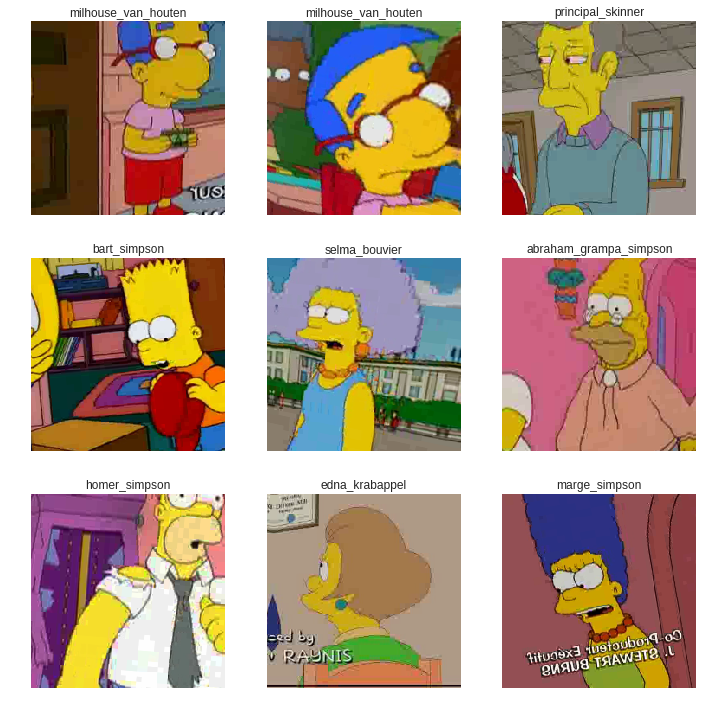

In [12]:
data.show_batch(rows=3, figsize=(10,10))

In [0]:
data.classes[:5]

['abraham_grampa_simpson',
 'agnes_skinner',
 'apu_nahasapeemapetilon',
 'barney_gumble',
 'bart_simpson']

In [13]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 53067957.25it/s]


In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
1,1.309216,0.712617,0.182991,05:45
2,0.702330,0.396912,0.107262,05:48
3,0.503711,0.313702,0.083851,06:04
4,0.408093,0.295647,0.081462,05:49


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.top_losses()
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [0]:
interp.most_confused(min_val=2)

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)